# Part 1: Analyzing Best-Seller Trends Across Product Categories

Objective: Understand the relationship between product categories and their best-seller status.

## 1. Crosstab Analysis:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats

In [3]:
df = pd.read_csv('/Users/mac/IronHacks/W2/D5/lab_2/lab-eda-bivariate/amz_uk_price_prediction_dataset.csv')

In [4]:
display(df.head())
display(df.info())
display(df.describe())

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


None

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [5]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=2443651, step=1)

### Create a crosstab between the product category and the isBestSeller status.

In [7]:
crosstab_bc = pd.crosstab(df['category'], df['isBestSeller'])
display(crosstab_bc)

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


### Are there categories where being a best-seller is more prevalent?
    (Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.)

In [8]:
crosstab_bc_prop = (pd.crosstab(df['category'], df['isBestSeller'], normalize = 'index') * 100).round(2)

display(crosstab_bc_prop)

isBestSeller,False,True
category,,
3D Printers,99.60,0.40
3D Printing & Scanning,99.95,0.05
Abrasive & Finishing Products,98.00,2.00
Action Cameras,99.94,0.06
Adapters,98.82,1.18
...,...,...
Wind Instruments,97.20,2.80
Window Treatments,97.91,2.09
Women,98.80,1.20


In [9]:
crosstab_prop_sorted = crosstab_bc_prop.sort_values(by=True, ascending=False)

print(crosstab_prop_sorted[True])

category
Grocery                           5.81
Smart Home Security & Lighting    5.77
Health & Personal Care            5.77
Mobile Phone Accessories          4.25
Power & Hand Tools                3.53
                                  ... 
CPUs                              0.00
CD, Disc & Tape Players           0.00
Blank Media Cases & Wallets       0.00
Boxes & Organisers                0.00
eBook Readers & Accessories       0.00
Name: True, Length: 296, dtype: float64


A: Answer: Yes, based on the crosstab analysis, there are significant differences in best-seller prevalence across categories.

## 2. Statistical Tests:

### Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

In [10]:
contingency_table = pd.crosstab(df['category'], df['isBestSeller'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# chi2 = Valor do Qui-quadrado (quanto maior, mais "estranho") #
# p_value = Probabilidade de ser por acaso                     #            NOTAS PARA
# dof = Graus de liberdade (não vamos usar agora)              #                MIM
# expected = O que esperaríamos se fosse por acaso             #

print(f"Qui-quadrado: {chi2:.2f}\n")
print(f"Valor-p: {p_value:.4f}\n")

# Verificamos se o valor-p é significativo

if p_value < 0.05:
    print("CONCLUSÃO: Best-seller NÃO é independente da categoria! Existe relação REAL entre categoria e ser best-seller")
else:
    print("CONCLUSÃO: Best-seller parece ser independente da categoria. Provavelmente é por acaso")

Qui-quadrado: 36540.20

Valor-p: 0.0000

CONCLUSÃO: Best-seller NÃO é independente da categoria! Existe relação REAL entre categoria e ser best-seller


### Compute Cramér's V to understand the strength of association between best-seller status and category.

In [ ]:
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))
print(f"Cramér's V: {cramers_v:.4f}")

# Interpretação do Cramér's V

if cramers_v < 0.1:
    print("Associação: Muito fraca")
elif cramers_v < 0.3:
    print("Associação: Fraca")
elif cramers_v < 0.5:
    print("Associação: Moderada")
else:
    print("Associação: Forte")

Cramér's V: 0.1223
Associação: Fraca


## 3. Visualizations:

### Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

<Figure size 1400x800 with 0 Axes>

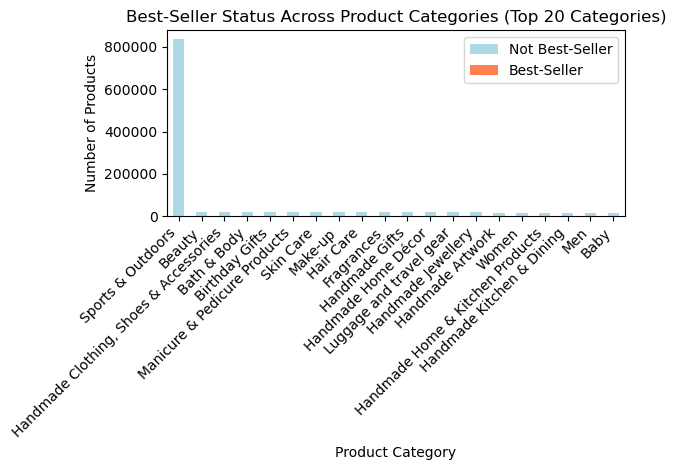

In [ ]:

# Criar o crosstab para visualização

crosstab_data = pd.crosstab(df['category'], df['isBestSeller'])

# Top 20 categorias

top_categories = df['category'].value_counts().head(20).index
crosstab_top = crosstab_data.loc[top_categories]


# Criando o stacked bar chart

plt.figure(figsize=(14, 8))
crosstab_top.plot(kind='bar', stacked=True, color=['lightblue', 'coral'])
plt.title('Best-Seller Status Across Product Categories (Top 20 Categories)')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.legend(['Not Best-Seller', 'Best-Seller'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Part 2: Exploring Product Prices and Ratings Across Categories and Brands

Objective: Investigate how different product categories influence product prices.

## 0. Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

    Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

In [ ]:
# Removendo outliers usando o método IQR

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

## 1. Violin Plots:

### Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.

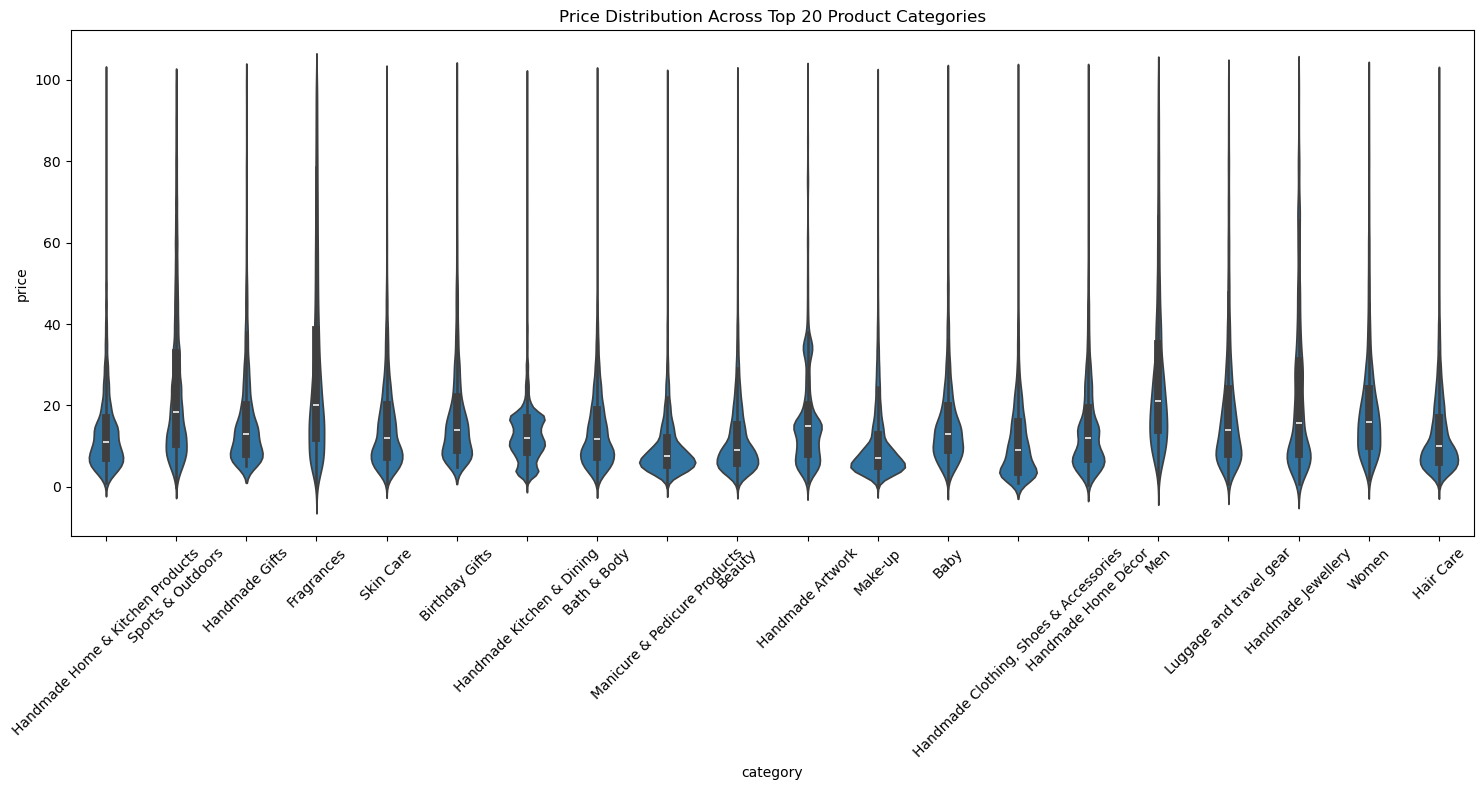

In [ ]:
df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

#Top 20 categories

top_20_categories = df_clean['category'].value_counts().head(20).index
df_top20 = df_clean[df_clean['category'].isin(top_20_categories)]

plt.figure(figsize=(15, 8))
sns.violinplot(data=df_top20, x='category', y='price')
plt.title('Price Distribution Across Top 20 Product Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Which product category tends to have the highest median price? Don't filter here by top categories.

In [ ]:
# Encontrando a categoria com o maior preço de mediana (Todas as categorias)

median_prices = df_clean.groupby('category')['price'].median().sort_values(ascending=False)
print("Category with highest median price:", median_prices.index[0])
print("Highest median price:", median_prices.iloc[0])

Category with highest median price: Desktop PCs
Highest median price: 74.0


## 2. Bar Charts:

### Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

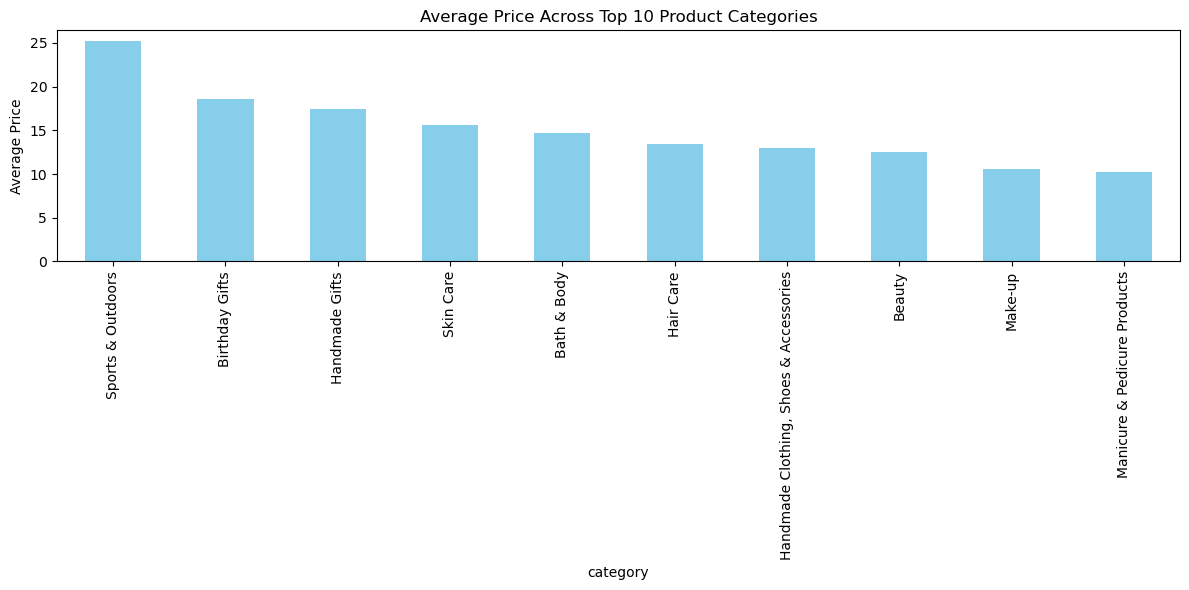

In [16]:
top_10_categories = df_clean['category'].value_counts().head(10).index
df_top10 = df_clean[df_clean['category'].isin(top_10_categories)]

avg_prices = df_top10.groupby('category')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_prices.plot(kind='bar', color='skyblue')
plt.title('Average Price Across Top 10 Product Categories')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

### Which product category commands the highest average price? Don't filter here by top categories.

In [ ]:
# Encontrando a categoria com o maior preço médio (Todas as categorias)

avg_prices_all = df_clean.groupby('category')['price'].mean().sort_values(ascending=False)
print("Category with highest average price:", avg_prices_all.index[0])
print("Highest average price:", avg_prices_all.iloc[0])


Category with highest average price: Motherboards
Highest average price: 68.77243243243242


## 3. Box Plots:

### Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.

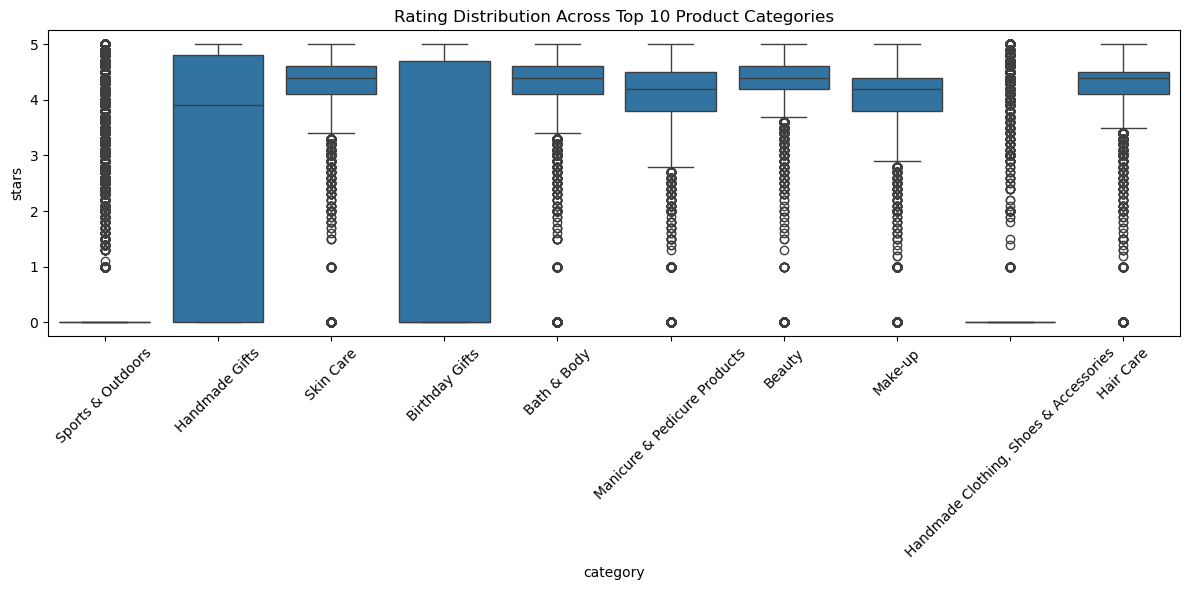

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top10, x='category', y='stars')
plt.title('Rating Distribution Across Top 10 Product Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [25]:
# Encontrando a categoria com o maior mediana em "rating" (Todas as categorias)

median_ratings = df_clean.groupby('category')['stars'].median().sort_values(ascending=False)
print("Category with highest median rating:", median_ratings.index[0])
print("Highest median rating:", median_ratings.iloc[0])

Category with highest median rating: Computer Memory
Highest median rating: 4.7


# Part 3: Investigating the Interplay Between Product Prices and Ratings

## Visualizations:

### Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

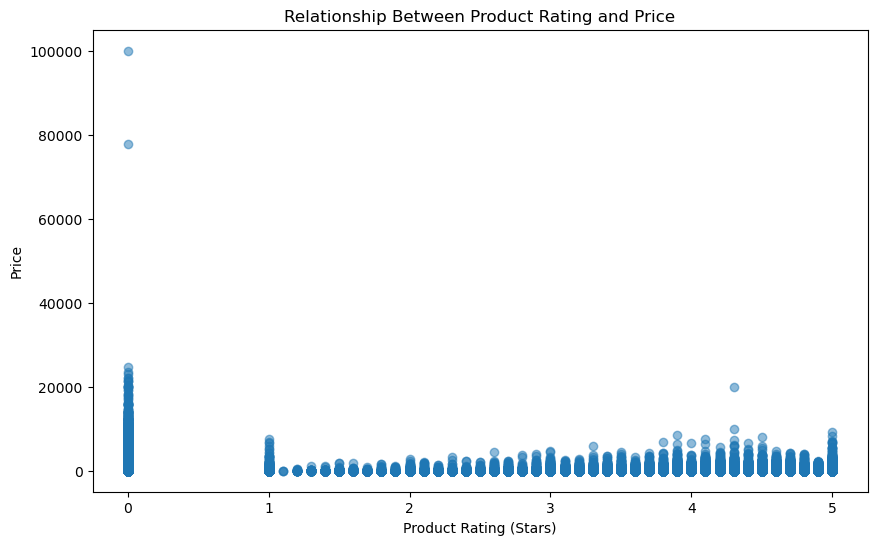

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df['stars'], df['price'], alpha=0.5)
plt.xlabel('Product Rating (Stars)')
plt.ylabel('Price')
plt.title('Relationship Between Product Rating and Price')
plt.show()


In [21]:
correlation = df['price'].corr(df['stars'])
print(f"Correlation between price and rating: {correlation:.4f}")

Correlation between price and rating: -0.1249


### Use a correlation heatmap to visualize correlations between all numerical variables.

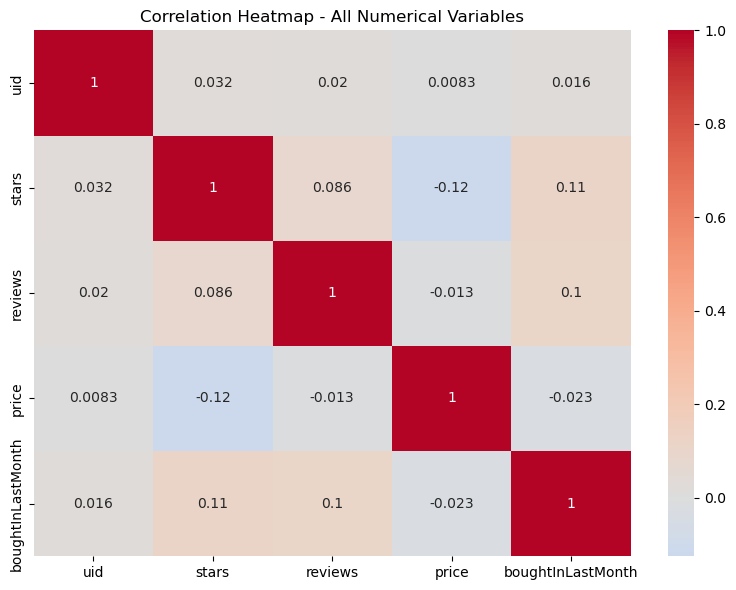

In [22]:
numerical_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap - All Numerical Variables')
plt.tight_layout()
plt.show()

### Examine if product prices typically follow a normal distribution using a QQ plot.

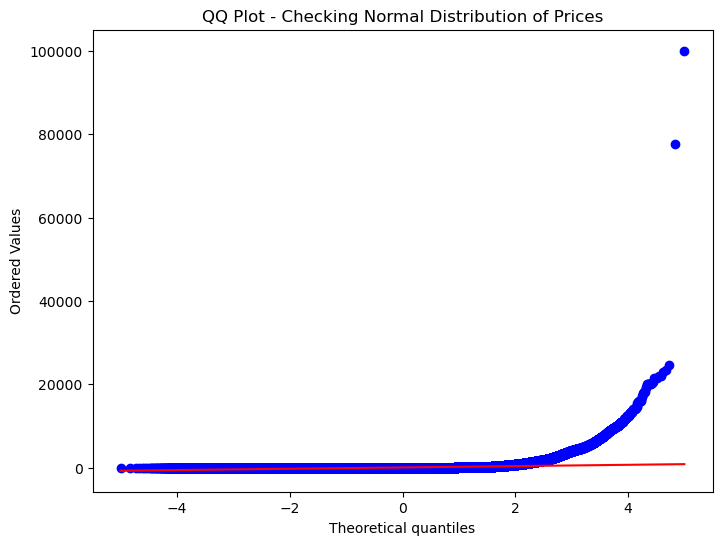

In [23]:
plt.figure(figsize=(8, 6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('QQ Plot - Checking Normal Distribution of Prices')
plt.show()